In [377]:
#import warnings
#warnings.filterwarnings('ignore')

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet

from lightgbm import LGBMRegressor

#from sklearn import preprocessing

In [378]:
weather_df = pd.read_csv('fiveyearsweatherdata.csv', header = 0) 
weather_df.head()

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Info,Conditions
0,"Kolkata,West Bengal,India",01/01/2017,14.0,25.3,19.9,16.5,82.47,NaN,5.8,NaN,...,1.2,4.9,1015.9,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
1,"Kolkata,West Bengal,India",01/02/2017,16.0,26.0,20.6,16.0,76.76,NaN,8.1,NaN,...,1.4,0.3,1015.6,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
2,"Kolkata,West Bengal,India",01/03/2017,16.0,27.0,21.1,15.6,73.12,27.3,9.2,NaN,...,1.6,10.7,1014.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
3,"Kolkata,West Bengal,India",01/04/2017,16.0,25.0,19.9,14.5,72.57,NaN,8.1,NaN,...,1.8,2.3,1014.6,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
4,"Kolkata,West Bengal,India",01/05/2017,15.0,25.6,19.6,13.7,71.88,NaN,8.1,NaN,...,1.9,0.0,1013.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear


In [379]:
weather_df.drop(columns = ['Info', 'Address', 'Resolved Address', 'Name', 'Date time', 'Weather Type', 'Conditions'], inplace = True)

In [380]:
weather_df.head()

,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Wind Direction,Wind Chill,Precipitation,Precipitation Cover,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Latitude,Longitude
0,14.0,25.3,19.9,16.5,82.47,NaN,5.8,NaN,78.33,NaN,0.0,0.0,0.0,1.2,4.9,1015.9,22.5705,88.3713
1,16.0,26.0,20.6,16.0,76.76,NaN,8.1,NaN,148.54,NaN,0.0,0.0,0.0,1.4,0.3,1015.6,22.5705,88.3713
2,16.0,27.0,21.1,15.6,73.12,27.3,9.2,NaN,244.92,NaN,0.0,0.0,0.0,1.6,10.7,1014.7,22.5705,88.3713
3,16.0,25.0,19.9,14.5,72.57,NaN,8.1,NaN,244.38,NaN,0.0,0.0,0.0,1.8,2.3,1014.6,22.5705,88.3713
4,15.0,25.6,19.6,13.7,71.88,NaN,8.1,NaN,231.58,NaN,0.0,0.0,0.0,1.9,0.0,1013.7,22.5705,88.3713


In [381]:
weather_df = weather_df.fillna(weather_df.mean())

In [382]:
weather_df.isna().sum()

Minimum Temperature    0
Maximum Temperature    0
Temperature            0
Dew Point              0
Relative Humidity      0
Heat Index             0
Wind Speed             0
Wind Gust              0
Wind Direction         0
Wind Chill             0
Precipitation          0
Precipitation Cover    0
Snow Depth             0
Visibility             0
Cloud Cover            0
Sea Level Pressure     0
Latitude               0
Longitude              0
dtype: int64

In [383]:
weather_df.head()

,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Wind Direction,Wind Chill,Precipitation,Precipitation Cover,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Latitude,Longitude
0,14.0,25.3,19.9,16.5,82.47,40.563588,5.8,30.265517,78.33,8.730769,0.0,0.0,0.0,1.2,4.9,1015.9,22.5705,88.3713
1,16.0,26.0,20.6,16.0,76.76,40.563588,8.1,30.265517,148.54,8.730769,0.0,0.0,0.0,1.4,0.3,1015.6,22.5705,88.3713
2,16.0,27.0,21.1,15.6,73.12,27.300000,9.2,30.265517,244.92,8.730769,0.0,0.0,0.0,1.6,10.7,1014.7,22.5705,88.3713
3,16.0,25.0,19.9,14.5,72.57,40.563588,8.1,30.265517,244.38,8.730769,0.0,0.0,0.0,1.8,2.3,1014.6,22.5705,88.3713
4,15.0,25.6,19.6,13.7,71.88,40.563588,8.1,30.265517,231.58,8.730769,0.0,0.0,0.0,1.9,0.0,1013.7,22.5705,88.3713


In [384]:
y = weather_df.pop('Temperature')

In [385]:
y = y.to_numpy()
y

array([19.9, 20.6, 21.1, ..., 20. , 20.2, 21.1])

In [386]:
weather_df.head()

,Minimum Temperature,Maximum Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Wind Direction,Wind Chill,Precipitation,Precipitation Cover,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Latitude,Longitude
0,14.0,25.3,16.5,82.47,40.563588,5.8,30.265517,78.33,8.730769,0.0,0.0,0.0,1.2,4.9,1015.9,22.5705,88.3713
1,16.0,26.0,16.0,76.76,40.563588,8.1,30.265517,148.54,8.730769,0.0,0.0,0.0,1.4,0.3,1015.6,22.5705,88.3713
2,16.0,27.0,15.6,73.12,27.300000,9.2,30.265517,244.92,8.730769,0.0,0.0,0.0,1.6,10.7,1014.7,22.5705,88.3713
3,16.0,25.0,14.5,72.57,40.563588,8.1,30.265517,244.38,8.730769,0.0,0.0,0.0,1.8,2.3,1014.6,22.5705,88.3713
4,15.0,25.6,13.7,71.88,40.563588,8.1,30.265517,231.58,8.730769,0.0,0.0,0.0,1.9,0.0,1013.7,22.5705,88.3713


In [387]:
x = weather_df.to_numpy()
x

array([[  14.    ,   25.3   ,   16.5   , ..., 1015.9   ,   22.5705,
          88.3713],
       [  16.    ,   26.    ,   16.    , ..., 1015.6   ,   22.5705,
          88.3713],
       [  16.    ,   27.    ,   15.6   , ..., 1014.7   ,   22.5705,
          88.3713],
       ...,
       [  15.    ,   26.    ,   11.5   , ..., 1017.    ,   22.5705,
          88.3713],
       [  14.9   ,   26.    ,   13.6   , ..., 1017.5   ,   22.5705,
          88.3713],
       [  15.1   ,   27.    ,   16.    , ..., 1016.4   ,   22.5705,
          88.3713]])

In [388]:
x.shape, y.shape

((4017, 17), (4017,))

In [389]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True, test_size = 0.1)

In [390]:
x_train.shape, x_test.shape

((3615, 17), (402, 17))

In [391]:
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [392]:
y_pred_lr = lrmodel.predict(x_test)

In [393]:
lrp = mean_absolute_percentage_error(y_pred_lr, y_test)
lrp

0.006146466574903605

In [394]:
lre = mean_absolute_error(y_pred_lr, y_test)
lre

0.16254113273626816

In [395]:
lgbmrmodel = LGBMRegressor()
lgbmrmodel.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2025
[LightGBM] [Info] Number of data points in the train set: 3615, number of used features: 13
[LightGBM] [Info] Start training from score 26.613776


LGBMRegressor()

In [396]:
y_pred_lgbmr = lgbmrmodel.predict(x_test)

In [397]:
lgbmrp = mean_absolute_percentage_error(y_pred_lgbmr, y_test)
lgbmrp

0.006513606376588742

In [398]:
lgbmre = mean_absolute_error(y_pred_lgbmr, y_test)
lgbmre

0.16672355116168416

In [399]:
gbrmodel = GradientBoostingRegressor()
gbrmodel.fit(x_train, y_train)

GradientBoostingRegressor()

In [400]:
y_pred_gbr = gbrmodel.predict(x_test)

In [401]:
gbrp = mean_absolute_percentage_error(y_pred_gbr, y_test)
gbrp

0.010364322418100112

In [402]:
gbre = mean_absolute_error(y_pred_gbr, y_test)
gbre

0.27245875312253964

In [403]:
brmodel = BayesianRidge()
brmodel.fit(x_train, y_train)

BayesianRidge()

In [404]:
y_pred_br = brmodel.predict(x_test)

In [405]:
brp = mean_absolute_percentage_error(y_pred_br, y_test)
brp

0.006147485975823549

In [406]:
bre = mean_absolute_error(y_pred_br, y_test)
bre

0.16257224855967609

In [407]:
enrmodel = ElasticNet()
enrmodel.fit(x_train, y_train)

ElasticNet()

In [408]:
y_pred_enr = enrmodel.predict(x_test)

In [409]:
enrp = mean_absolute_percentage_error(y_pred_enr, y_test)
enrp

0.010606812699150476

In [410]:
enre = mean_absolute_error(y_pred_enr, y_test)
enre

0.274411107981018

In [411]:
data = {'Name': ['LinearRegression', 'LGBMRegressor', 'GradientBoostingRegressor', 'BayesianRidge', 'Elastic Net'], 'Mean Absolute Percentage Error': [lrp, lgbmrp, gbrp, brp, enrp], 'Mean Absolute Error': [lre, lgbmre, gbre, bre, enre]}
df = pd.DataFrame(data)
df

,Name,Mean Absolute Percentage Error,Mean Absolute Error
0,LinearRegression,0.006146,0.162541
1,LGBMRegressor,0.006514,0.166724
2,GradientBoostingRegressor,0.010364,0.272459
3,BayesianRidge,0.006147,0.162572
4,Elastic Net,0.010607,0.274411


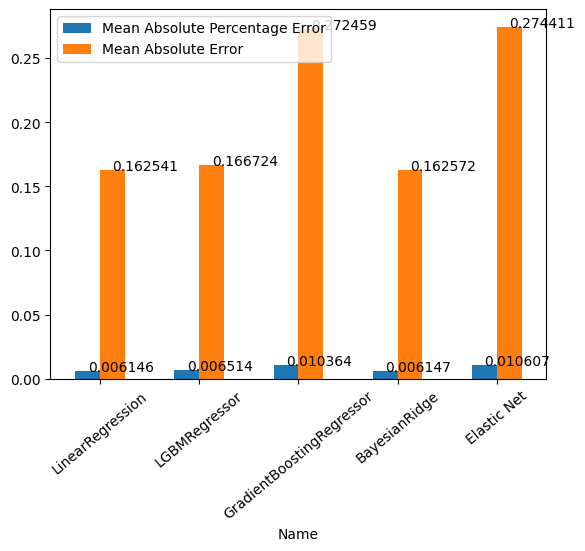

In [412]:
fig, ax = plt.subplots()
df.plot.bar(x = 'Name', y = ['Mean Absolute Percentage Error', 'Mean Absolute Error'], rot = 40, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=6), (p.get_x()+p.get_width()/2., p.get_height()))